In [1]:
### Housekeeping ###
import os

### Data ###
import numpy as np
import pandas as pd
import scipy.io

### Visualization ###
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Machine Learning ###
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Statistics ###
import scipy.stats as stats
import statsmodels.stats.multitest as smm

### RNA-Seq ###
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

import gseapy as gp
from gseapy.plot import gseaplot

/Users/ninaadkalla/.pyenv/versions/3.10.6/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
data_dir = os.path.join('..', 'data', 'E-GEOD-60052-raw-counts.tsv')
meta_dir = os.path.join('..', 'data', 'E-GEOD-60052-experiment-design.tsv')

df = pd.read_csv(data_dir, sep='\t')
meta_df = pd.read_csv(meta_dir, sep='\t')

In [3]:
df = df[['Gene ID', 'Gene Name', 'SRR1797218', 'SRR1797219', 'SRR1797220',
       'SRR1797221', 'SRR1797222', 'SRR1797223', 'SRR1797224', 'SRR1797225',
       'SRR1797226', 'SRR1797227', 'SRR1797228', 'SRR1797229', 'SRR1797230',
       'SRR1797231']]

df

,Gene ID,Gene Name,SRR1797218,SRR1797219,SRR1797220,SRR1797221,SRR1797222,SRR1797223,SRR1797224,SRR1797225,SRR1797226,SRR1797227,SRR1797228,SRR1797229,SRR1797230,SRR1797231
0,ENSG00000000003,TSPAN6,99,33,14,14,48,104,174,16,7,269,37,24,15,8
1,ENSG00000000005,TNMD,51,2,26,13,0,12,0,0,0,0,0,0,0,1
2,ENSG00000000419,DPM1,33,52,11,0,12,109,104,2,0,67,19,13,0,5
3,ENSG00000000457,SCYL3,67,141,45,23,183,81,193,62,5,186,80,67,32,30
4,ENSG00000000460,C1orf112,39,110,28,52,53,154,71,57,0,252,33,71,17,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65212,ENSG00000281918,NaN,0,0,6,0,6,1,0,0,49,4,9,2,0,11
65213,ENSG00000281919,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65214,ENSG00000281920,NaN,0,0,0,1,5,0,0,0,0,0,0,2,0,4
65215,ENSG00000281921,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df['Gene Name'] = df['Gene Name'].fillna(df['Gene ID'])
df

,Gene ID,Gene Name,SRR1797218,SRR1797219,SRR1797220,SRR1797221,SRR1797222,SRR1797223,SRR1797224,SRR1797225,SRR1797226,SRR1797227,SRR1797228,SRR1797229,SRR1797230,SRR1797231
0,ENSG00000000003,TSPAN6,99,33,14,14,48,104,174,16,7,269,37,24,15,8
1,ENSG00000000005,TNMD,51,2,26,13,0,12,0,0,0,0,0,0,0,1
2,ENSG00000000419,DPM1,33,52,11,0,12,109,104,2,0,67,19,13,0,5
3,ENSG00000000457,SCYL3,67,141,45,23,183,81,193,62,5,186,80,67,32,30
4,ENSG00000000460,C1orf112,39,110,28,52,53,154,71,57,0,252,33,71,17,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65212,ENSG00000281918,ENSG00000281918,0,0,6,0,6,1,0,0,49,4,9,2,0,11
65213,ENSG00000281919,ENSG00000281919,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65214,ENSG00000281920,ENSG00000281920,0,0,0,1,5,0,0,0,0,0,0,2,0,4
65215,ENSG00000281921,ENSG00000281921,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
gene_ids = df['Gene ID']
df.drop(columns=['Gene ID'], inplace=True)
gene_ids

0        ENSG00000000003
1        ENSG00000000005
2        ENSG00000000419
3        ENSG00000000457
4        ENSG00000000460
              ...       
65212    ENSG00000281918
65213    ENSG00000281919
65214    ENSG00000281920
65215    ENSG00000281921
65216    ENSG00000281922
Name: Gene ID, Length: 65217, dtype: object

In [6]:
gene_names = df['Gene Name']
gene_names

0                 TSPAN6
1                   TNMD
2                   DPM1
3                  SCYL3
4               C1orf112
              ...       
65212    ENSG00000281918
65213    ENSG00000281919
65214    ENSG00000281920
65215    ENSG00000281921
65216    ENSG00000281922
Name: Gene Name, Length: 65217, dtype: object

In [7]:
df

,Gene Name,SRR1797218,SRR1797219,SRR1797220,SRR1797221,SRR1797222,SRR1797223,SRR1797224,SRR1797225,SRR1797226,SRR1797227,SRR1797228,SRR1797229,SRR1797230,SRR1797231
0,TSPAN6,99,33,14,14,48,104,174,16,7,269,37,24,15,8
1,TNMD,51,2,26,13,0,12,0,0,0,0,0,0,0,1
2,DPM1,33,52,11,0,12,109,104,2,0,67,19,13,0,5
3,SCYL3,67,141,45,23,183,81,193,62,5,186,80,67,32,30
4,C1orf112,39,110,28,52,53,154,71,57,0,252,33,71,17,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65212,ENSG00000281918,0,0,6,0,6,1,0,0,49,4,9,2,0,11
65213,ENSG00000281919,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65214,ENSG00000281920,0,0,0,1,5,0,0,0,0,0,0,2,0,4
65215,ENSG00000281921,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df = df.T
df.columns = df.iloc[0]
df = df[1:]
df.rename_axis(None, axis=1,inplace=True)
df

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ENSG00000281913,ENSG00000281914,ENSG00000281915,ENSG00000281916,ENSG00000281917,ENSG00000281918,ENSG00000281919,ENSG00000281920,ENSG00000281921,ENSG00000281922
SRR1797218,99,51,33,67,39,128,597,20,171,153,...,0,0,0,0,0,0,0,0,0,0
SRR1797219,33,2,52,141,110,419,454,57,198,155,...,0,0,0,0,0,0,0,0,0,0
SRR1797220,14,26,11,45,28,197,473,17,90,147,...,0,0,0,0,0,6,0,0,0,0
SRR1797221,14,13,0,23,52,76,65,14,30,11,...,0,0,0,0,0,0,0,1,0,0
SRR1797222,48,0,12,183,53,314,134,60,299,133,...,0,0,0,0,0,6,0,5,0,0
SRR1797223,104,12,109,81,154,418,499,118,278,253,...,0,0,0,0,0,1,0,0,0,0
SRR1797224,174,0,104,193,71,635,337,81,290,286,...,0,0,0,0,0,0,0,0,0,0
SRR1797225,16,0,2,62,57,13,33,26,104,36,...,0,0,0,0,0,0,0,0,0,0
SRR1797226,7,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,49,0,0,0,0
SRR1797227,269,0,67,186,252,20,220,69,227,336,...,0,0,0,0,0,4,0,0,0,0


In [9]:
df = df.loc[:,~df.columns.duplicated()].copy()
df

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ENSG00000281913,ENSG00000281914,ENSG00000281915,ENSG00000281916,ENSG00000281917,ENSG00000281918,ENSG00000281919,ENSG00000281920,ENSG00000281921,ENSG00000281922
SRR1797218,99,51,33,67,39,128,597,20,171,153,...,0,0,0,0,0,0,0,0,0,0
SRR1797219,33,2,52,141,110,419,454,57,198,155,...,0,0,0,0,0,0,0,0,0,0
SRR1797220,14,26,11,45,28,197,473,17,90,147,...,0,0,0,0,0,6,0,0,0,0
SRR1797221,14,13,0,23,52,76,65,14,30,11,...,0,0,0,0,0,0,0,1,0,0
SRR1797222,48,0,12,183,53,314,134,60,299,133,...,0,0,0,0,0,6,0,5,0,0
SRR1797223,104,12,109,81,154,418,499,118,278,253,...,0,0,0,0,0,1,0,0,0,0
SRR1797224,174,0,104,193,71,635,337,81,290,286,...,0,0,0,0,0,0,0,0,0,0
SRR1797225,16,0,2,62,57,13,33,26,104,36,...,0,0,0,0,0,0,0,0,0,0
SRR1797226,7,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,49,0,0,0,0
SRR1797227,269,0,67,186,252,20,220,69,227,336,...,0,0,0,0,0,4,0,0,0,0


In [10]:
df.shape

(14, 64069)

In [11]:
genes_to_keep = df.columns[df.sum(axis=0) >= 10]
len(genes_to_keep)

40452

In [12]:
filtered_df = df[genes_to_keep]
filtered_df

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ENSG00000281883,ENSG00000281884,ENSG00000281888,ENSG00000281892,ENSG00000281896,LINC02246,ENSG00000281904,LINC01144,ENSG00000281918,ENSG00000281920
SRR1797218,99,51,33,67,39,128,597,20,171,153,...,0,0,0,0,6,9,6,1,0,0
SRR1797219,33,2,52,141,110,419,454,57,198,155,...,3,0,1,0,79,15,31,0,0,0
SRR1797220,14,26,11,45,28,197,473,17,90,147,...,0,0,0,0,15,0,9,0,6,0
SRR1797221,14,13,0,23,52,76,65,14,30,11,...,0,0,12,0,13,0,135,0,0,1
SRR1797222,48,0,12,183,53,314,134,60,299,133,...,9,3,0,0,65,0,38,0,6,5
SRR1797223,104,12,109,81,154,418,499,118,278,253,...,0,0,0,0,61,1,21,6,1,0
SRR1797224,174,0,104,193,71,635,337,81,290,286,...,5,4,0,17,44,12,23,33,0,0
SRR1797225,16,0,2,62,57,13,33,26,104,36,...,0,14,0,18,0,0,11,13,0,0
SRR1797226,7,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49,0
SRR1797227,269,0,67,186,252,20,220,69,227,336,...,0,0,0,0,47,0,0,15,4,0


In [13]:
meta_df

,Run,Sample Characteristic[age],Sample Characteristic Ontology Term[age],Sample Characteristic[clinical information],Sample Characteristic Ontology Term[clinical information],Sample Characteristic[disease],Sample Characteristic Ontology Term[disease],Sample Characteristic[ethnic group],Sample Characteristic Ontology Term[ethnic group],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[organism part],Sample Characteristic Ontology Term[organism part],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Factor Value[disease],Factor Value Ontology Term[disease],Analysed
0,SRR1797218,66.0,NaN,smoker,NaN,normal,http://purl.obolibrary.org/obo/PATO_0000461,Chinese,http://purl.obolibrary.org/obo/HANCESTRO_0021,B08-3483,NaN,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,lung,http://purl.obolibrary.org/obo/UBERON_0002048,male,http://purl.obolibrary.org/obo/PATO_0000384,normal,http://purl.obolibrary.org/obo/PATO_0000461,Yes
1,SRR1797219,70.0,NaN,smoker,NaN,normal,http://purl.obolibrary.org/obo/PATO_0000461,Chinese,http://purl.obolibrary.org/obo/HANCESTRO_0021,B08-3758,NaN,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,lung,http://purl.obolibrary.org/obo/UBERON_0002048,male,http://purl.obolibrary.org/obo/PATO_0000384,normal,http://purl.obolibrary.org/obo/PATO_0000461,Yes
2,SRR1797220,45.0,NaN,smoker,NaN,normal,http://purl.obolibrary.org/obo/PATO_0000461,Chinese,http://purl.obolibrary.org/obo/HANCESTRO_0021,B08-4386,NaN,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,lung,http://purl.obolibrary.org/obo/UBERON_0002048,male,http://purl.obolibrary.org/obo/PATO_0000384,normal,http://purl.obolibrary.org/obo/PATO_0000461,Yes
3,SRR1797221,52.0,NaN,non-smoker,NaN,normal,http://purl.obolibrary.org/obo/PATO_0000461,Chinese,http://purl.obolibrary.org/obo/HANCESTRO_0021,B08-4579,NaN,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,lung,http://purl.obolibrary.org/obo/UBERON_0002048,female,http://purl.obolibrary.org/obo/PATO_0000383,normal,http://purl.obolibrary.org/obo/PATO_0000461,Yes
4,SRR1797222,51.0,NaN,smoker,NaN,normal,http://purl.obolibrary.org/obo/PATO_0000461,Chinese,http://purl.obolibrary.org/obo/HANCESTRO_0021,B08-4497,NaN,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,lung,http://purl.obolibrary.org/obo/UBERON_0002048,male,http://purl.obolibrary.org/obo/PATO_0000384,normal,http://purl.obolibrary.org/obo/PATO_0000461,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,SRR1797299,55.0,NaN,smoker,NaN,small cell lung carcinoma,http://www.ebi.ac.uk/efo/EFO_0000702,Chinese,http://purl.obolibrary.org/obo/HANCESTRO_0021,B10-5656,NaN,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,lung,http://purl.obolibrary.org/obo/UBERON_0002048,male,http://purl.obolibrary.org/obo/PATO_0000384,small cell lung carcinoma,http://www.ebi.ac.uk/efo/EFO_0000702,Yes
82,SRR1797300,NaN,NaN,NaN,NaN,small cell lung carcinoma,http://www.ebi.ac.uk/efo/EFO_0000702,NaN,NaN,B11-4067,NaN,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,lung,http://purl.obolibrary.org/obo/UBERON_0002048,NaN,NaN,small cell lung carcinoma,http://www.ebi.ac.uk/efo/EFO_0000702,Yes
83,SRR1797301,58.0,NaN,smoker,NaN,small cell lung carcinoma,http://www.ebi.ac.uk/efo/EFO_0000702,Chinese,http://purl.obolibrary.org/obo/HANCESTRO_0021,B11-548,NaN,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,lung,http://purl.obolibrary.org/obo/UBERON_0002048,male,http://purl.obolibrary.org/obo/PATO_0000384,small cell lung carcinoma,http://www.ebi.ac.uk/efo/EFO_0000702,Yes
84,SRR1797302,NaN,NaN,NaN,NaN,small cell lung carcinoma,http://www.ebi.ac.uk/efo/EFO_0000702,NaN,NaN,B12-1866,NaN,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,lung,http://purl.obolibrary.org/obo/UBERON_0002048,NaN,NaN,small cell lung carcinoma,http://www.ebi.ac.uk/efo/EFO_

In [14]:
meta_df = meta_df[['Run', 'Sample Characteristic[disease]']]
meta_df.rename(columns={'Sample Characteristic[disease]':'condition'}, inplace=True)
meta_df = meta_df.loc[:13]
meta_df

/var/folders/0g/p_g1qhzs21b7wdvfslhc9m9m0000gn/T/ipykernel_96397/2823331425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df.rename(columns={'Sample Characteristic[disease]':'condition'}, inplace=True)


,Run,condition
0,SRR1797218,normal
1,SRR1797219,normal
2,SRR1797220,normal
3,SRR1797221,normal
4,SRR1797222,normal
5,SRR1797223,normal
6,SRR1797224,normal
7,SRR1797225,small cell lung carcinoma
8,SRR1797226,small cell lung carcinoma
9,SRR1797227,small cell lung carcinoma


In [15]:
meta_df.set_index('Run', inplace=True)
meta_df = meta_df.rename_axis(None)
meta_df

,condition
SRR1797218,normal
SRR1797219,normal
SRR1797220,normal
SRR1797221,normal
SRR1797222,normal
SRR1797223,normal
SRR1797224,normal
SRR1797225,small cell lung carcinoma
SRR1797226,small cell lung carcinoma
SRR1797227,small cell lung carcinoma


In [16]:
meta_df

,condition
SRR1797218,normal
SRR1797219,normal
SRR1797220,normal
SRR1797221,normal
SRR1797222,normal
SRR1797223,normal
SRR1797224,normal
SRR1797225,small cell lung carcinoma
SRR1797226,small cell lung carcinoma
SRR1797227,small cell lung carcinoma


In [17]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=df,
    metadata=meta_df,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
)

In [18]:
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 2.84 seconds.

Fitting dispersion trend curve...
... done in 1.53 seconds.

Fitting MAP dispersions...
... done in 2.62 seconds.

Fitting LFCs...
... done in 2.86 seconds.

Refitting 2437 outliers.

Fitting dispersions...
... done in 0.14 seconds.

Fitting MAP dispersions...
... done in 0.09 seconds.

Fitting LFCs...
... done in 0.14 seconds.

/Users/ninaadkalla/.pyenv/versions/3.10.6/lib/python3.10/site-packages/pydeseq2/dds.py:1019: ImplicitModificationWarning: Setting element `.varm['_normed_means']` of view, initializing view as actual.
  self[:, self.new_all_zeroes_genes].varm["_normed_means"] = np.zeros(
/Users/ninaadkalla/.pyenv/versions/3.10.6/lib/python3.10/site-packages/pydeseq2/dds.py:1022: ImplicitModificationWarning: Setting element `.varm['LFC']` of view, initializing view as actual.
  self[:, self.new_all_zeroes_genes].varm["LFC"] = np.zeros(


In [19]:
dds

AnnData object with n_obs × n_vars = 14 × 64069
    obs: 'condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

In [20]:
stat_res = DeseqStats(dds, inference=inference)
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition small cell lung carcinoma vs normal
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
TSPAN6           38.966518        0.141483  0.582873  0.242733  0.808212   
TNMD              6.701685       -5.250835  1.871132 -2.806235  0.005012   
DPM1             16.605970       -0.829452  0.941047 -0.881413  0.378094   
SCYL3            63.530409        0.161843  0.417087  0.388032  0.697992   
C1orf112         60.419754        0.515233  0.660993  0.779484  0.435695   
...                    ...             ...       ...       ...       ...   
ENSG00000281918  13.437709        4.303438  1.509116  2.851629  0.004350   
ENSG00000281919   0.000000             NaN       NaN       NaN       NaN   
ENSG00000281920   1.215913        1.454585  2.907188  0.500341  0.616835   
ENSG00000281921   0.000000             NaN       NaN       NaN       NaN   
ENSG00000281922   0.000000             NaN       NaN       NaN       NaN   

   

... done in 1.62 seconds.



In [21]:
results = stat_res.results_df
results

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,38.966518,0.141483,0.582873,0.242733,0.808212,0.919385
TNMD,6.701685,-5.250835,1.871132,-2.806235,0.005012,0.036823
DPM1,16.605970,-0.829452,0.941047,-0.881413,0.378094,0.635968
SCYL3,63.530409,0.161843,0.417087,0.388032,0.697992,0.862516
C1orf112,60.419754,0.515233,0.660993,0.779484,0.435695,0.687601
...,...,...,...,...,...,...
ENSG00000281918,13.437709,4.303438,1.509116,2.851629,0.004350,0.033266
ENSG00000281919,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000281920,1.215913,1.454585,2.907188,0.500341,0.616835,NaN
ENSG00000281921,0.000000,NaN,NaN,NaN,NaN,NaN


In [22]:
results = results[(results['padj'] < 0.05)]
results = results[(abs(results['log2FoldChange']) > 0.05)]
results = results[(results['baseMean'] > 20)]
results

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
FGR,100.056579,-3.089075,0.709176,-4.355866,0.000013,0.000334
CFH,130.724283,-2.766088,0.721651,-3.833001,0.000127,0.002187
STPG1,64.404799,1.284923,0.359773,3.571482,0.000355,0.004889
MYH16,34.992936,2.387034,0.776137,3.075531,0.002101,0.019426
CD99,303.947070,-2.573743,0.580821,-4.431213,0.000009,0.000252
...,...,...,...,...,...,...
SLFNL1-AS1,156.691300,1.688534,0.408775,4.130717,0.000036,0.000772
ENSG00000281383,161.731600,1.042863,0.350528,2.975122,0.002929,0.024828
DBET,78.953069,3.414572,1.198291,2.849534,0.004378,0.033428
ENSG00000281637,34.665380,1.860007,0.649706,2.862845,0.004199,0.032401


In [23]:
results.sort_values(by=['log2FoldChange'], ascending=False, inplace=True)
results

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000278047,50.846771,9.670826,2.841062,3.403948,6.641946e-04,7.894812e-03
OTOL1,22.914299,8.534219,1.855671,4.598995,4.245348e-06,1.303698e-04
RNA5SP262,22.087185,8.484585,1.813975,4.677343,2.906157e-06,9.619415e-05
VGF,33.678826,7.244735,1.321964,5.480282,4.246492e-08,2.655011e-06
ENSG00000276707,22.299726,7.158607,2.369835,3.020719,2.521752e-03,2.223093e-02
...,...,...,...,...,...,...
SCGB1A1,273.492478,-6.866903,0.979694,-7.009235,2.396239e-12,4.990026e-10
SFTPA2,10501.593263,-6.985833,0.775113,-9.012662,2.011151e-19,1.969960e-16
ENSG00000273760,20.163062,-7.352101,1.510460,-4.867457,1.130431e-06,4.301657e-05
TNNC1,20.989349,-7.401183,1.512946,-4.891901,9.986673e-07,3.895457e-05


In [24]:
top50 = results.head(50)
bot50 = results.tail(50)
de_res = pd.concat([top50, bot50])
de_res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000278047,50.846771,9.670826,2.841062,3.403948,6.641946e-04,7.894812e-03
OTOL1,22.914299,8.534219,1.855671,4.598995,4.245348e-06,1.303698e-04
RNA5SP262,22.087185,8.484585,1.813975,4.677343,2.906157e-06,9.619415e-05
VGF,33.678826,7.244735,1.321964,5.480282,4.246492e-08,2.655011e-06
ENSG00000276707,22.299726,7.158607,2.369835,3.020719,2.521752e-03,2.223093e-02
...,...,...,...,...,...,...
SCGB1A1,273.492478,-6.866903,0.979694,-7.009235,2.396239e-12,4.990026e-10
SFTPA2,10501.593263,-6.985833,0.775113,-9.012662,2.011151e-19,1.969960e-16
ENSG00000273760,20.163062,-7.352101,1.510460,-4.867457,1.130431e-06,4.301657e-05
TNNC1,20.989349,-7.401183,1.512946,-4.891901,9.986673e-07,3.895457e-05


In [25]:
dds.layers['normed_counts']

array([[62.20157586, 32.04323605, 20.73385862, ...,  0.        ,
         0.        ,  0.        ],
       [18.38228414,  1.11407783, 28.96602349, ...,  0.        ,
         0.        ,  0.        ],
       [12.31784702, 22.87600161,  9.67830837, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [35.06793206,  0.        , 18.99512987, ...,  2.92232767,
         0.        ,  0.        ],
       [27.41236214,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [18.04885243,  2.25610655, 11.28053277, ...,  9.02442622,
         0.        ,  0.        ]])

In [26]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])
dds.layers['log1p']

array([[4.14632924, 3.49781689, 3.07887135, ..., 0.        , 0.        ,
        0.        ],
       [2.96435946, 0.7486187 , 3.40006419, ..., 0.        , 0.        ,
        0.        ],
       [2.58910502, 3.17287384, 2.36821443, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [3.58540416, 0.        , 2.99548874, ..., 1.36668527, 0.        ,
        0.        ],
       [3.34682434, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.94700686, 1.18053217, 2.50801531, ..., 2.30502474, 0.        ,
        0.        ]])

In [27]:
dds_sigs = dds[:, de_res.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 14 × 100
    obs: 'condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks', 'log1p'

In [28]:
de_df = pd.DataFrame(dds_sigs.layers['log1p'].T,
                     index=dds_sigs.var_names,
                     columns=dds_sigs.obs_names)
de_df

,SRR1797218,SRR1797219,SRR1797220,SRR1797221,SRR1797222,SRR1797223,SRR1797224,SRR1797225,SRR1797226,SRR1797227,SRR1797228,SRR1797229,SRR1797230,SRR1797231
ENSG00000278047,0.487536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.454494,1.911789,0.000000,0.000000,0.000000,9.142201,4.196105
OTOL1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.793371,0.000000,0.000000,1.321684,3.193707,4.953831,4.714466
RNA5SP262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.879985,3.604042,3.408612,5.252583,2.050054
VGF,0.000000,1.171911,0.000000,0.000000,0.000000,0.000000,0.332626,5.525852,4.565655,0.000000,4.103923,3.769854,1.537938,2.947007
ENSG00000276707,0.000000,0.982497,0.000000,0.000000,0.000000,0.000000,0.000000,3.944299,0.000000,0.000000,0.000000,1.923468,4.706367,4.979425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCGB1A1,2.652839,6.314396,7.315150,4.458741,6.444927,6.071387,6.371689,0.000000,0.000000,0.000000,2.405353,2.919605,0.000000,1.706966
SFTPA2,9.111534,10.619156,9.942566,8.835844,10.151898,8.556062,10.529332,6.135410,4.705364,1.494692,2.003644,4.243837,6.012566,4.561808
ENSG00000273760,3.639417,4.140454,2.823593,0.000000,3.948212,4.297341,3.811054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TNNC1,0.487536,3.912411,3.486594,3.927980,4.636921,3.703357,3.087178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


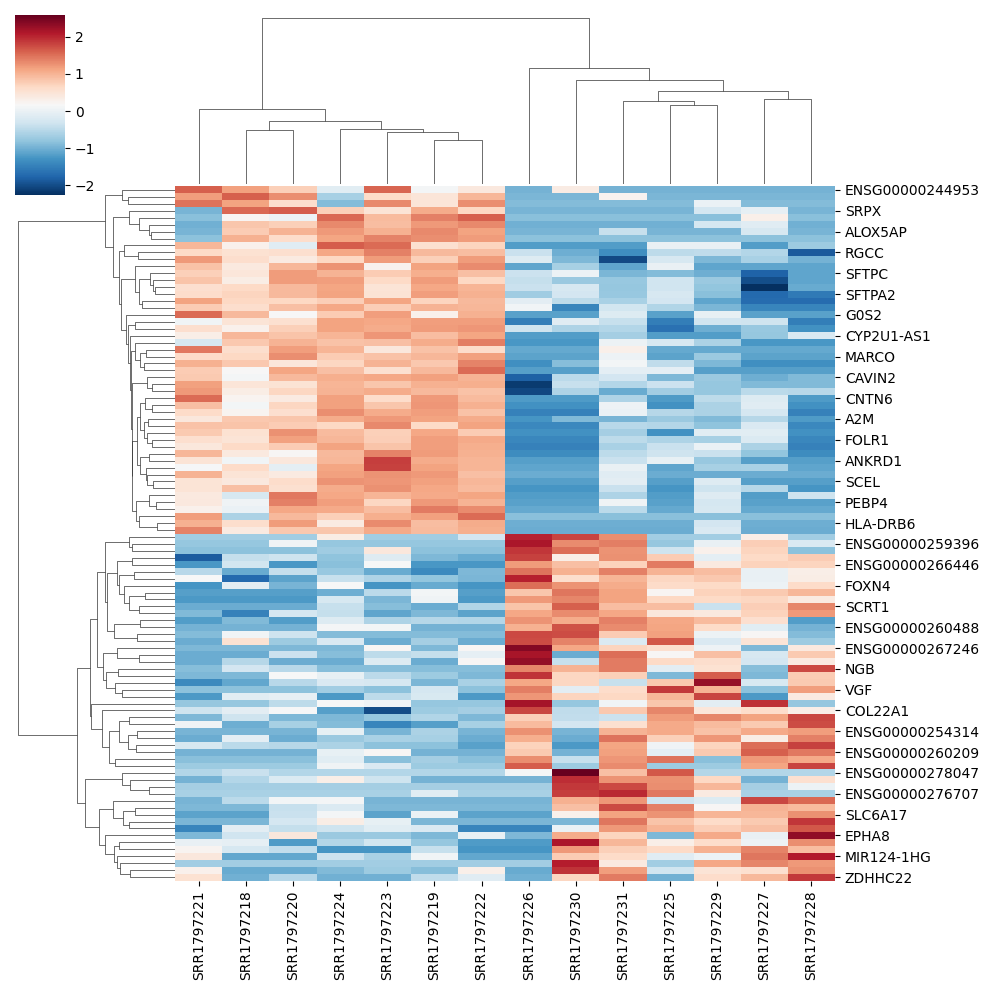

In [29]:
sns.clustermap(de_df, z_score=0, cmap='RdBu_r')

In [30]:
de_df

,SRR1797218,SRR1797219,SRR1797220,SRR1797221,SRR1797222,SRR1797223,SRR1797224,SRR1797225,SRR1797226,SRR1797227,SRR1797228,SRR1797229,SRR1797230,SRR1797231
ENSG00000278047,0.487536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.454494,1.911789,0.000000,0.000000,0.000000,9.142201,4.196105
OTOL1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.793371,0.000000,0.000000,1.321684,3.193707,4.953831,4.714466
RNA5SP262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.879985,3.604042,3.408612,5.252583,2.050054
VGF,0.000000,1.171911,0.000000,0.000000,0.000000,0.000000,0.332626,5.525852,4.565655,0.000000,4.103923,3.769854,1.537938,2.947007
ENSG00000276707,0.000000,0.982497,0.000000,0.000000,0.000000,0.000000,0.000000,3.944299,0.000000,0.000000,0.000000,1.923468,4.706367,4.979425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCGB1A1,2.652839,6.314396,7.315150,4.458741,6.444927,6.071387,6.371689,0.000000,0.000000,0.000000,2.405353,2.919605,0.000000,1.706966
SFTPA2,9.111534,10.619156,9.942566,8.835844,10.151898,8.556062,10.529332,6.135410,4.705364,1.494692,2.003644,4.243837,6.012566,4.561808
ENSG00000273760,3.639417,4.140454,2.823593,0.000000,3.948212,4.297341,3.811054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TNNC1,0.487536,3.912411,3.486594,3.927980,4.636921,3.703357,3.087178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
de_df.index

Index(['ENSG00000278047', 'OTOL1', 'RNA5SP262', 'VGF', 'ENSG00000276707',
       'HOXD10', 'NKX2-2', 'SCRT1', 'NGB', 'ENSG00000259396', 'BARHL1',
       'TFAP2B', 'TTC9B', 'DLX2', 'RNA5SP141', 'TMEM151B', 'ENSG00000254314',
       'SNORA71A', 'SLC30A3', 'DMRTA2', 'CALML3', 'C14orf180', 'SLC8A2',
       'CHD5', 'AQP2', 'ENSG00000239776', 'PCDH8', 'ENSG00000267246',
       'ENSG00000259663', 'TRIM9', 'PSD2', 'COL22A1', 'RALYL',
       'ENSG00000280788', 'TUBB3', 'TMEM63C', 'FOXN4', 'MIR124-1HG', 'CDH22',
       'SLC6A17', 'TERT', 'ENSG00000260488', 'ZDHHC22', 'ENSG00000231252',
       'ENSG00000235683', 'KCND2', 'ENSG00000260209', 'ENSG00000266446',
       'EPHA8', 'RNA5S9', 'CXCL2', 'G0S2', 'FAM107A', 'ENSG00000244953',
       'HBA2', 'LINC01290', 'TBX21', 'MYCT1', 'WIF1', 'CNTN6', 'FOLR1',
       'PEBP4', 'AQP4', 'ENSG00000279312', 'EDN1', 'SCN7A', 'RGCC', 'MAOA',
       'TBX4', 'CXCL8', 'CLEC3B', 'A2M', 'ICAM1', 'SRPX', 'CAV1', 'PGC',
       'ROS1', 'PTGS2', 'LINC01671', 'SFTPD', 'MMR

In [32]:
de_df.columns

Index(['SRR1797218', 'SRR1797219', 'SRR1797220', 'SRR1797221', 'SRR1797222',
       'SRR1797223', 'SRR1797224', 'SRR1797225', 'SRR1797226', 'SRR1797227',
       'SRR1797228', 'SRR1797229', 'SRR1797230', 'SRR1797231'],
      dtype='object')